<a href="https://colab.research.google.com/github/arjunsumina/analytics_code/blob/main/rcode_bmr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Task 1 : CONDITION INFERENCE DECISION TREE with readingSkills data (disrete dependent variable)*

In [7]:
#install.packages('caTools')
install.packages('party')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’




In [8]:
library(tidyverse)
library(datasets)
library(caTools)
library(party)
library(dplyr)
library(magrittr)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary



Attaching package: ‘party’


The following object is masked from ‘package:dplyr’:

    where



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




read the dataset<br>
data set consists of one dependent variable - native speaker or not native speaker<br>
the independent variables are age, shoesize and score<br>

In [18]:
head(readingSkills)
print('number of rows of data')
nrow(readingSkills)
print('number of columns of data')
ncol(readingSkills)
print('dimension of data')
dim(readingSkills)

,nativeSpeaker,age,shoeSize,score
,<fct>,<int>,<dbl>,<dbl>
1,yes,5,24.83189,32.29385
2,yes,6,25.95238,36.63105
3,no,11,30.42170,49.60593
4,yes,7,28.66450,40.28456
5,yes,11,31.88207,55.46085
6,yes,10,30.07843,52.83124


[1] "number of rows of data"


[1] 200

[1] "number of columns of data"


[1] 4

[1] "dimension of data"


[1] 200   4

the decision tree has to predict whether a person is native speaker or not based on the features such as age, shoesize and score<br>
set.seed(123) or set.seed(number) ensures that the results are reproducible
training data comprises of randomly selected 80% rows of original data<br>
testing data comprises of the rest 20% rows of the original data<br>


In [31]:
set.seed(12)
sample_data = sample.split(readingSkills, SplitRatio = 0.8)
train_data <- subset(readingSkills, sample_data == TRUE)
test_data <- subset(readingSkills, sample_data == FALSE)

Conditional Inference Trees is a tree-based classification algorithm. It is similar to the decision trees as ctree() also performs recursively partitioning of data just like decision trees. The only procedure that makes conditional inference trees different from decision trees is that conditional inference trees use a significance test to select input variables rather than selecting the variable that maximizes the information measure. For example, the Gini coefficient is used in traditional decision trees to select the variable that maximizes the information measure.

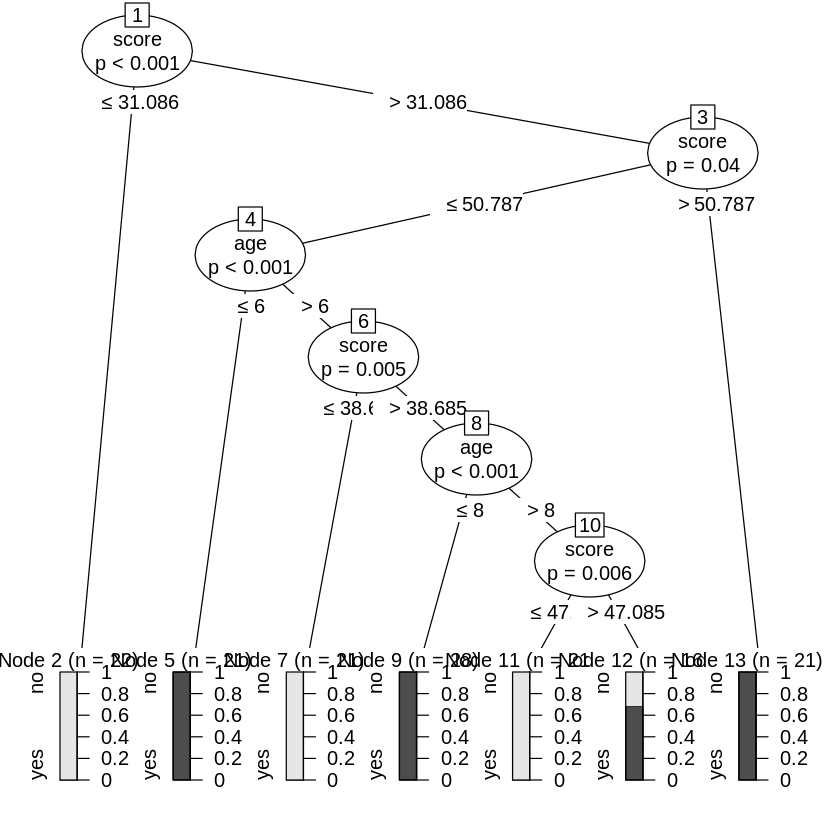

In [32]:
#ctree stands for conditional inference trees
model<- ctree(nativeSpeaker ~ ., train_data)
plot(model)

predict the result for a decision tree using test data

In [37]:
predict_model_native_speaker<-predict(model, test_data)
print(predict_model_native_speaker)


 [1] yes no  yes no  no  no  yes yes yes yes no  yes no  yes yes no  no  yes no 
[20] no  no  no  no  yes yes no  yes no  no  no  yes yes no  yes no  no  yes no 
[39] yes no  no  no  no  no  yes yes yes no  yes no 
Levels: no yes


     predict_model_native_speaker
      no yes
  no  28   3
  yes  0  19

computing the confusion matrix

In [39]:
table(test_data$nativeSpeaker, predict_model_native_speaker)


     predict_model_native_speaker
      no yes
  no  28   3
  yes  0  19

In [41]:
table_mat <- table(test_data$nativeSpeaker, predict_model_native_speaker)
accuracy <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy for test is found to be', accuracy))

[1] "Accuracy for test is found to be 0.94"


*Task 2 : Conditional Inference Decision Tree with Ozone Data (Continuous Dependent Variable)*

---



In [42]:
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [43]:
anyNA(airquality)

[1] TRUE

In [45]:
#Remove rows with NA's using na.omit()
airquality_cleaned <- na.omit(airquality)

In [46]:
conditional_inference_decision_model <- ctree(Ozone ~ ., data = airquality_cleaned)


	 Conditional inference tree with 5 terminal nodes

Response:  Ozone 
Inputs:  Solar.R, Wind, Temp, Month, Day 
Number of observations:  111 

1) Temp <= 82; criterion = 1, statistic = 53.676
  2) Wind <= 6.9; criterion = 0.999, statistic = 14.175
    3)*  weights = 9 
  2) Wind > 6.9
    4) Temp <= 77; criterion = 0.997, statistic = 11.921
      5)*  weights = 47 
    4) Temp > 77
      6)*  weights = 21 
1) Temp > 82
  7) Wind <= 10.3; criterion = 0.998, statistic = 12.625
    8)*  weights = 27 
  7) Wind > 10.3
    9)*  weights = 7 


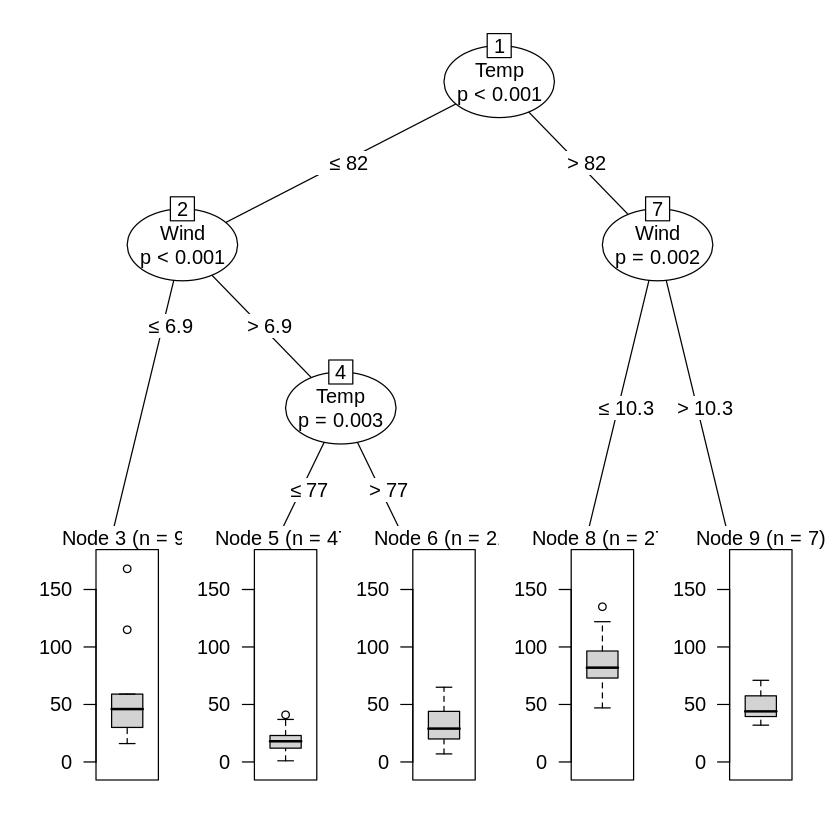

In [48]:
print(conditional_inference_decision_model)
plot(conditional_inference_decision_model)


In [56]:
predict_model_ozone<-predict(conditional_inference_decision_model, airquality_cleaned)
print(predict_model_ozone)

          Ozone
  [1,] 18.27660
  [2,] 18.27660
  [3,] 18.27660
  [4,] 18.27660
  [5,] 18.27660
  [6,] 18.27660
  [7,] 18.27660
  [8,] 18.27660
  [9,] 18.27660
 [10,] 18.27660
 [11,] 18.27660
 [12,] 18.27660
 [13,] 18.27660
 [14,] 18.27660
 [15,] 18.27660
 [16,] 18.27660
 [17,] 18.27660
 [18,] 18.27660
 [19,] 18.27660
 [20,] 18.27660
 [21,] 18.27660
 [22,] 31.14286
 [23,] 61.00000
 [24,] 18.27660
 [25,] 31.14286
 [26,] 48.71429
 [27,] 48.71429
 [28,] 31.14286
 [29,] 18.27660
 [30,] 18.27660
 [31,] 18.27660
 [32,] 18.27660
 [33,] 18.27660
 [34,] 84.07407
 [35,] 84.07407
 [36,] 31.14286
 [37,] 84.07407
 [38,] 48.71429
 [39,] 84.07407
 [40,] 84.07407
 [41,] 84.07407
 [42,] 84.07407
 [43,] 18.27660
 [44,] 31.14286
 [45,] 31.14286
 [46,] 61.00000
 [47,] 31.14286
 [48,] 84.07407
 [49,] 84.07407
 [50,] 48.71429
 [51,] 61.00000
 [52,] 84.07407
 [53,] 84.07407
 [54,] 31.14286
 [55,] 48.71429
 [56,] 84.07407
 [57,] 84.07407
 [58,] 84.07407
 [59,] 31.14286
 [60,] 61.00000
 [61,] 31.14286
 [62,] 3

In [60]:
head(airquality_cleaned)
print(airquality_cleaned$Ozone)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8


  [1]  41  36  12  18  23  19   8  16  11  14  18  14  34   6  30  11   1  11
 [19]   4  32  23  45 115  37  29  71  39  23  21  37  20  12  13 135  49  32
 [37]  64  40  77  97  97  85  10  27   7  48  35  61  79  63  16  80 108  20
 [55]  52  82  50  64  59  39   9  16 122  89 110  44  28  65  22  59  23  31
 [73]  44  21   9  45 168  73  76 118  84  85  96  78  73  91  47  32  20  23
 [91]  21  24  44  21  28   9  13  46  18  13  24  16  13  23  36   7  14  30
[109]  14  18  20


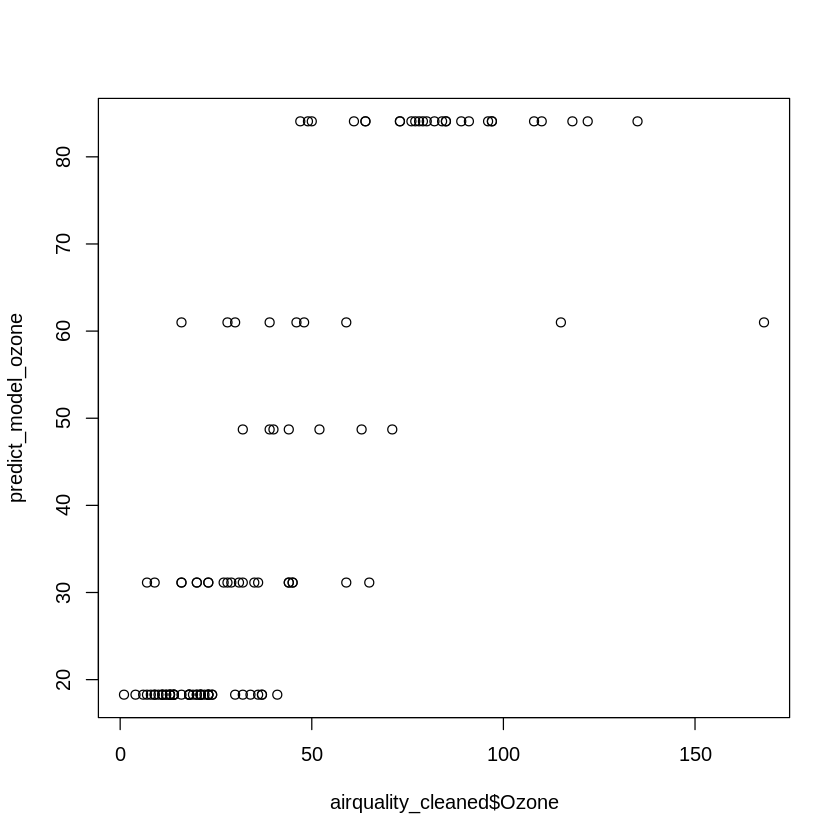

Market Basket Analysis

In [63]:
# create a list of baskets
market_basket <-
  list(
  c("apple", "beer", "rice", "meat"),
  c("apple", "beer", "rice"),
  c("apple", "beer"),
  c("apple", "pear"),
  c("milk", "beer", "rice", "meat"),
  c("milk", "beer", "rice"),
  c("milk", "beer"),
  c("milk", "pear")
  )


In [68]:
str(market_basket)

List of 8
 $ T1: chr [1:4] "apple" "beer" "rice" "meat"
 $ T2: chr [1:3] "apple" "beer" "rice"
 $ T3: chr [1:2] "apple" "beer"
 $ T4: chr [1:2] "apple" "pear"
 $ T5: chr [1:4] "milk" "beer" "rice" "meat"
 $ T6: chr [1:3] "milk" "beer" "rice"
 $ T7: chr [1:2] "milk" "beer"
 $ T8: chr [1:2] "milk" "pear"


In [64]:
# set transaction names (T1 to T8)
names(market_basket) <- paste("T", c(1:8), sep = "")

In [65]:
market_basket

$T1
[1] "apple" "beer"  "rice"  "meat" 

$T2
[1] "apple" "beer"  "rice" 

$T3
[1] "apple" "beer" 

$T4
[1] "apple" "pear" 

$T5
[1] "milk" "beer" "rice" "meat"

$T6
[1] "milk" "beer" "rice"

$T7
[1] "milk" "beer"

$T8
[1] "milk" "pear"

*When you buy X items , you buy an item Y
If all of the X items are there in a basket, there is a high likelihood that you buy Y => ASSOCIATION RULE*

There are many associations that you can find inside a store. But we need to focus only on the relevant ones based on parameters such as support, lift and
confidence


In [71]:
#support of apple
total_no_of_transaction <- 8
no_of_transactions_where_apple_is_there <- 4
support <- no_of_transactions_where_apple_is_there/total_no_of_transaction
print('support of apple is')
print(support)

[1] "support of apple is"
[1] 0.5


In [4]:
#confidence of beer => apple
# confidence indicate that the chance that apple is purchased given that the beer is selected
no_of_transaction_where_beer_is_there <- 6
no_of_transactions_with_apple_when_beer_has_been_selected <- 3
confidence_beer_to_apple <- 100*no_of_transactions_with_apple_when_beer_has_been_selected/no_of_transaction_where_beer_is_there
print('confidence beer to apple')
print(confidence_beer_to_apple)

# confidence of apple =>beer
# confidence indicate the chance that beer is purchased given that apple has been selected
no_of_transaction_where_apple_is_there <- 4
no_of_transactions_with_beer_when_apple_has_been_selected <- 3
confidence_apple_to_beer <- 100*no_of_transactions_with_beer_when_apple_has_been_selected/no_of_transaction_where_apple_is_there
print('confidence apple to beer')
print(confidence_apple_to_beer)


[1] "confidence beer to apple"
[1] 50
[1] "confidence apple to beer"
[1] 75


In [5]:
#lift of apple => beer or    X=>Y
# lift = P(Y/X)/P(Y)
# confidence apple X to beer Y = P(Y/X)
# confidence apple to beer is 75

no_of_transaction_where_apple_is_there <- 4
no_of_transactions_with_beer_when_apple_has_been_selected <- 3
confidence_apple_to_beer <- 100*no_of_transactions_with_beer_when_apple_has_been_selected/no_of_transaction_where_apple_is_there

total_number_of_transactions <- 8
transactions_where_beer_has_been_selected <- 6
probability_of_beer = 100*transactions_where_beer_has_been_selected/total_number_of_transactions

lift <- confidence_apple_to_beer/probability_of_beer
print('lift of apple => beer')
print(lift)

# LIFT = 1 MEANS THE VARIABLES X AND Y ARE INDEPENDENT. HENCE APPLE and BEER has no association
# LIFT > 1 MEANS THE VARIABLES X AND Y ARE NOT INDEPENDENT AND Y IS LIKELY TO BE BOUGHT IF X IS BOUGHT
# LIFT < 1 MEANS THE VARIABLES X AND Y ARE NOT INDEPENDENT AND Y IS LESS LIKELY TO BE BOUGHT IF X IS BOUGHT



[1] "lift of apple => beer"
[1] 1




Apriori Algorithm helps to find the frequent data sets <br>
If an itemset is infrequent, its subsets should also be infrequent.
For example, if {beer,apple} is infrequent, then {beer} also would be infrequent and need no be considered.

In summary, when you apply the A-Priori Algorithm on a given set of transactions, your goal will be to find all rules with support greater than or equal to your support threshold and confidence greater than or equal to your confidence threshold





In [6]:
install.packages("arules")
install.packages("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’




In [13]:
library(arules)
# create a list of baskets
market_basket <-
  list(
  c("apple", "beer", "rice", "meat"),
  c("apple", "beer", "rice"),
  c("apple", "beer"),
  c("apple", "pear"),
  c("milk", "beer", "rice", "meat"),
  c("milk", "beer", "rice"),
  c("milk", "beer"),
  c("milk", "pear")
  )
print(market_basket)
#transform the data into a transaction object
trans <- as(market_basket, "transactions")
print(trans)

[[1]]
[1] "apple" "beer"  "rice"  "meat" 

[[2]]
[1] "apple" "beer"  "rice" 

[[3]]
[1] "apple" "beer" 

[[4]]
[1] "apple" "pear" 

[[5]]
[1] "milk" "beer" "rice" "meat"

[[6]]
[1] "milk" "beer" "rice"

[[7]]
[1] "milk" "beer"

[[8]]
[1] "milk" "pear"

transactions in sparse format with
 8 transactions (rows) and
 6 items (columns)


In [15]:
# dimension and column names
dim(trans)
itemLabels(trans)


[1] 8 6

[1] "apple" "beer"  "meat"  "milk"  "pear"  "rice"

transactions as itemMatrix in sparse format with
 8 rows (elements/itemsets/transactions) and
 6 columns (items) and a density of 0.4583333 

most frequent items:
   beer   apple    milk    rice    meat (Other) 
      6       4       4       4       2       2 

element (itemset/transaction) length distribution:
sizes
2 3 4 
4 2 2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    2.50    2.75    3.25    4.00 

includes extended item information - examples:
  labels
1  apple
2   beer
3   meat

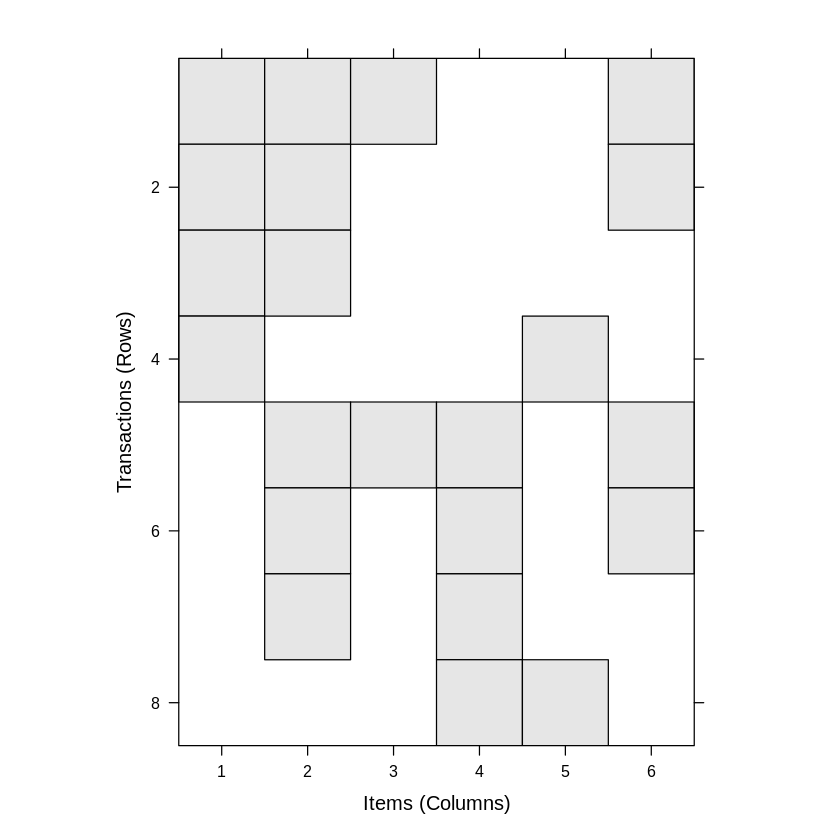

In [17]:
# percentage of non-zero cells in the 8*6 matrix is 45%
# two items - four transactions
# three items - two transactions
# four items - two transactions
summary(trans)
image(trans)


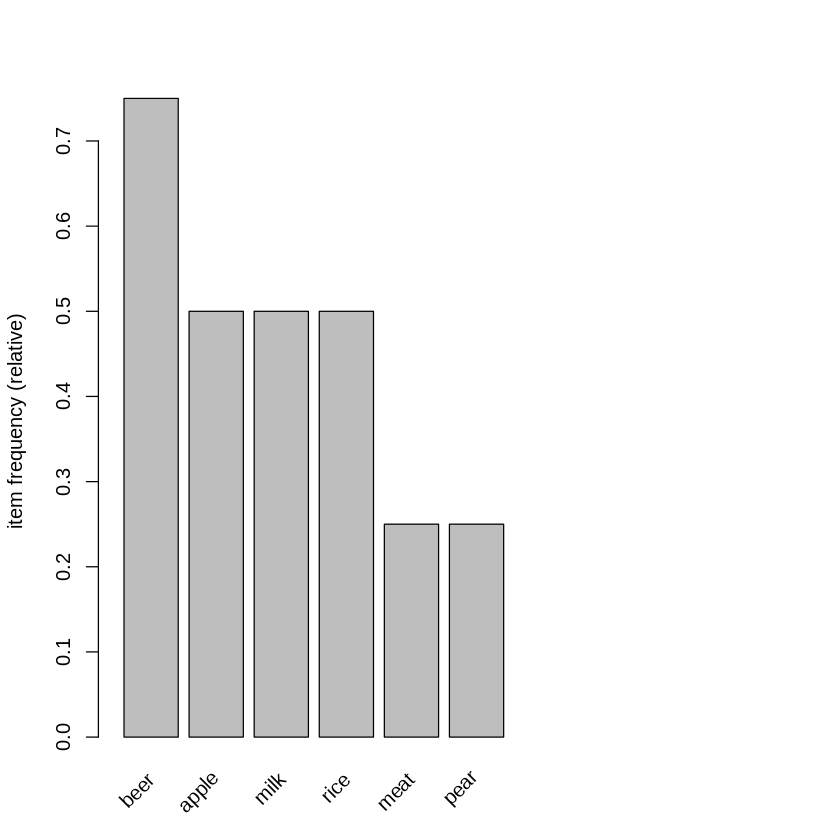

In [18]:
# relative frequency
itemFrequencyPlot(trans, topN=10,  cex.names=1)


In [19]:
# apriori algorithm using function apriori
#Min Support 0.3
#Min confidence as 0.5.
#Maximum length of items = 10
rules <- apriori(trans,
                 parameter = list(supp=0.3, conf=0.5,
                                  maxlen=10,
                                  target= "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [10 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [20]:
summary(rules)


set of 10 rules

rule length distribution (lhs + rhs):sizes
1 2 
4 6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     2.0     1.6     2.0     2.0 

summary of quality measures:
    support        confidence        coverage           lift      
 Min.   :0.375   Min.   :0.5000   Min.   :0.5000   Min.   :1.000  
 1st Qu.:0.375   1st Qu.:0.5000   1st Qu.:0.5625   1st Qu.:1.000  
 Median :0.500   Median :0.5833   Median :0.7500   Median :1.000  
 Mean   :0.475   Mean   :0.6417   Mean   :0.7750   Mean   :1.067  
 3rd Qu.:0.500   3rd Qu.:0.7500   3rd Qu.:1.0000   3rd Qu.:1.000  
 Max.   :0.750   Max.   :1.0000   Max.   :1.0000   Max.   :1.333  
     count    
 Min.   :3.0  
 1st Qu.:3.0  
 Median :4.0  
 Mean   :3.8  
 3rd Qu.:4.0  
 Max.   :6.0  

mining info:
  data ntransactions support confidence
 trans             8     0.3        0.5
                                                                                           call
 apriori(data = trans, parameter = li

In [22]:
inspect(rules)
# we can see four rules of length zero
# we can see six rules of length two

     lhs        rhs     support confidence coverage lift     count
[1]  {}      => {apple} 0.500   0.5000000  1.00     1.000000 4    
[2]  {}      => {milk}  0.500   0.5000000  1.00     1.000000 4    
[3]  {}      => {rice}  0.500   0.5000000  1.00     1.000000 4    
[4]  {}      => {beer}  0.750   0.7500000  1.00     1.000000 6    
[5]  {apple} => {beer}  0.375   0.7500000  0.50     1.000000 3    
[6]  {beer}  => {apple} 0.375   0.5000000  0.75     1.000000 3    
[7]  {milk}  => {beer}  0.375   0.7500000  0.50     1.000000 3    
[8]  {beer}  => {milk}  0.375   0.5000000  0.75     1.000000 3    
[9]  {rice}  => {beer}  0.500   1.0000000  0.50     1.333333 4    
[10] {beer}  => {rice}  0.500   0.6666667  0.75     1.333333 4    


In [27]:
# apriori algorithm using function apriori
#Min Support 0.3
#Min confidence as 0.5.
#Maximum length of items = 10
#Minimum length of itens = 2
rules <- apriori(trans,
                 parameter = list(supp=0.3, conf=0.5,
                                  maxlen=10,minlen=2,
                                  target= "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.3      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


rule 6 shows that given that a customer buys beer, he takes rice with a confidence of 67% and lift more than 1 indicating an association between beer
and rice
rule 5 shows that given that a customer buys rice, he takes beer has a confidence of 100% and lift of more than 1 indicating an association between beer and rice

In [28]:
inspect(rules)

    lhs        rhs     support confidence coverage lift     count
[1] {apple} => {beer}  0.375   0.7500000  0.50     1.000000 3    
[2] {beer}  => {apple} 0.375   0.5000000  0.75     1.000000 3    
[3] {milk}  => {beer}  0.375   0.7500000  0.50     1.000000 3    
[4] {beer}  => {milk}  0.375   0.5000000  0.75     1.000000 3    
[5] {rice}  => {beer}  0.500   1.0000000  0.50     1.333333 4    
[6] {beer}  => {rice}  0.500   0.6666667  0.75     1.333333 4    


In [35]:
# apriori algorithm using function apriori
#Min Support 0.3
#Min confidence as 0.5.
#Maximum length of items = 10
#Minimum length of itens = 3
rules <- apriori(trans,
                 parameter = list(supp=0.3, conf=0.5,
                                  maxlen=10,minlen=3,
                                  target= "rules"))
inspect(rules)


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.3      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


analysing a particular rule. The following will explore what product or combinationsbnations of product would lead to beer.,

In [32]:
beer_rules_rhs <- apriori(trans,
                          parameter = list(supp=0.3, conf=0.5,
                                         maxlen=10,
                                         minlen=2),
                          appearance = list(default="lhs", rhs="beer"))
inspect(beer_rules_rhs)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.3      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[6 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs        rhs    support confidence coverage lift     count
[1] {apple} => {beer} 0.375   0.75       0.5      1.000000 3    
[2] {milk}  => {beer} 0.375   0.75       0.5      1.000000 3    
[3] {rice}  => {beer} 0.500   1.00       0.5      1.333333 4    


analysing a particular rule. The following will explore what beer leads to other products

In [34]:
beer_rules_lhs <- apriori(trans,
                          parameter = list(supp=0.3, conf=0.5,
                                         maxlen=10,
                                         minlen=2),
                          appearance = list(lhs="beer", default="rhs"))
inspect(beer_rules_lhs)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.3      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[6 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs       rhs     support confidence coverage lift     count
[1] {beer} => {apple} 0.375   0.5000000  0.75     1.000000 3    
[2] {beer} => {milk}  0.375   0.5000000  0.75     1.000000 3    
[3] {beer} => {rice}  0.500   0.6666667  0.75     1.333333 4    


In [40]:
#visualization of rules
# apriori algorithm using function apriori
#Min Support 0.3
#Min confidence as 0.5.
#Maximum length of items = 10
#Minimum length of itens = 2
rules <- apriori(trans,
                 parameter = list(supp=0.3, conf=0.5,
                                  maxlen=10,minlen=2,
                                  target= "rules"))

inspect(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.3      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs        rhs     support confidence coverage lift     count
[1] {apple} => {beer}  0.375   0.7500000  0.50     1.000000 3    
[2] {beer}  => {apple} 0.375   0.5000000  0.75     1.000000 3    
[3] {milk}  => {beer}  0.375   0.7500000  0.50     1.000000 3    
[4] {beer}  => {milk}  0.375   0.50

graph representation for visualization


In [47]:
#visualization of rules
# apriori algorithm using function apriori
#Min Support 0.3
#Min confidence as 0.5.
#Maximum length of items = 10
#Minimum length of itens = 2
library(arulesViz)

rules <- apriori(trans,
                 parameter = list(supp=0.3, conf=0.5,
                                  maxlen=10,minlen=2,
                                  target= "rules"))
inspect(rules)
subrules <- head(rules, n = 2, by = "confidence")
inspect(subrules)
plot(subrules, method = "graph",  engine = "htmlwidget")

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.3      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[6 item(s), 8 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [6 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs        rhs     support confidence coverage lift     count
[1] {apple} => {beer}  0.375   0.7500000  0.50     1.000000 3    
[2] {beer}  => {apple} 0.375   0.5000000  0.75     1.000000 3    
[3] {milk}  => {beer}  0.375   0.7500000  0.50     1.000000 3    
[4] {beer}  => {milk}  0.375   0.50

HTML widgets cannot be represented in plain text (need html)

Prediction of wine quality based on random forest algorithm


In [48]:
# This command is used to load the dataset
wine <- read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"), header = TRUE, sep = ";")

In [50]:
head(wine) # Display the head and dimensions of wine dataset
print('dimensions of wine dataset')
dim(wine)


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


[1] "dimensions of wine dataset"


[1] 1599   12

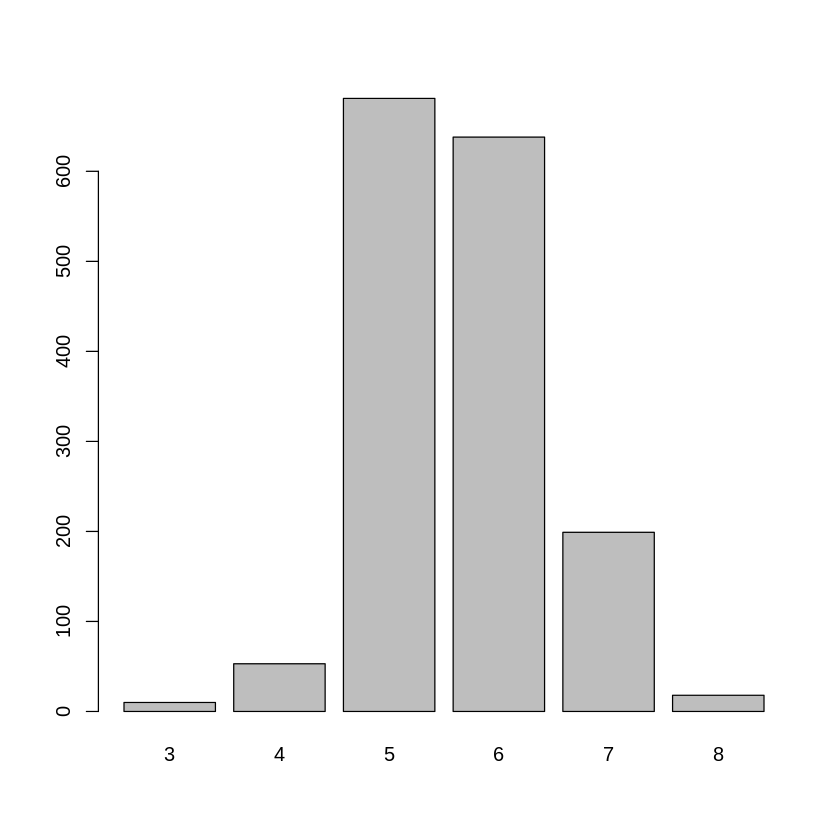

In [52]:
# Barplot to see the quality of wines. The output looks like below
barplot(table(wine$quality))



 Factor w/ 3 levels "bad","good","normal": 3 3 3 3 3 3 3 2 2 3 ...



   bad   good normal 
    63    217   1319 

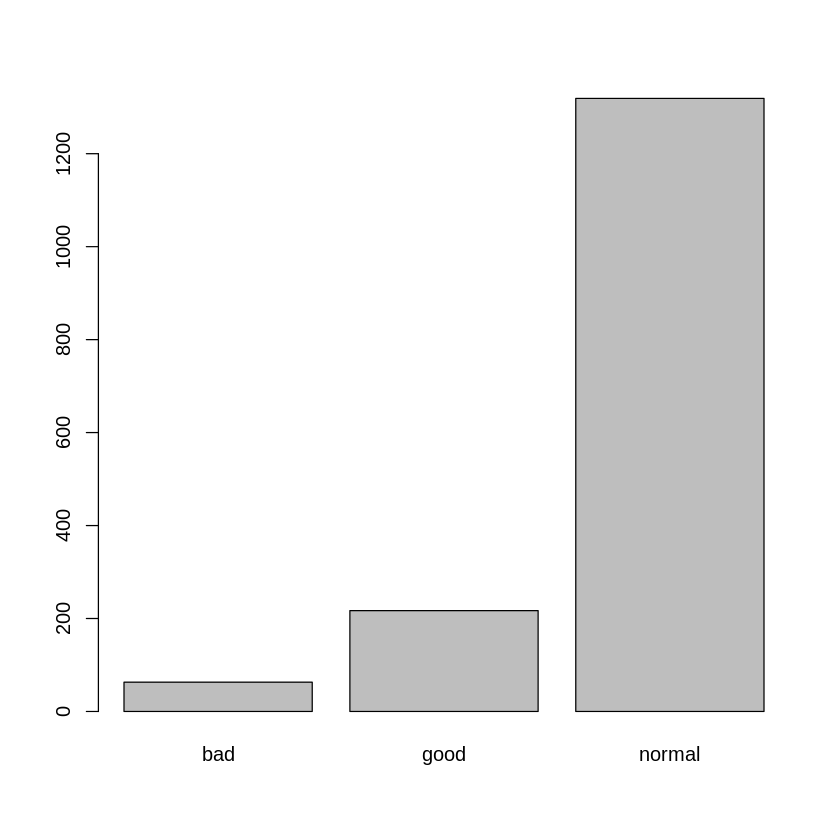

In [53]:
# Now, we have to convert the quality values into factors
wine$taste <- ifelse(wine$quality < 5, "bad", "good")
wine$taste[wine$quality == 5] <- "normal"
wine$taste[wine$quality == 6] <- "normal"
wine$taste <- as.factor(wine$taste)
str(wine$taste)
barplot(table(wine$taste)) # Barplot to view the taste of wines. The output is shown below.
table(wine$taste)

In [54]:
# Next, we need to split the data into training and testing. 80% for training, 20% for testing.
set.seed(123)
samp <- sample(nrow(wine), 0.8 * nrow(wine))
train <- wine[samp, ]
test <- wine[-samp, ]


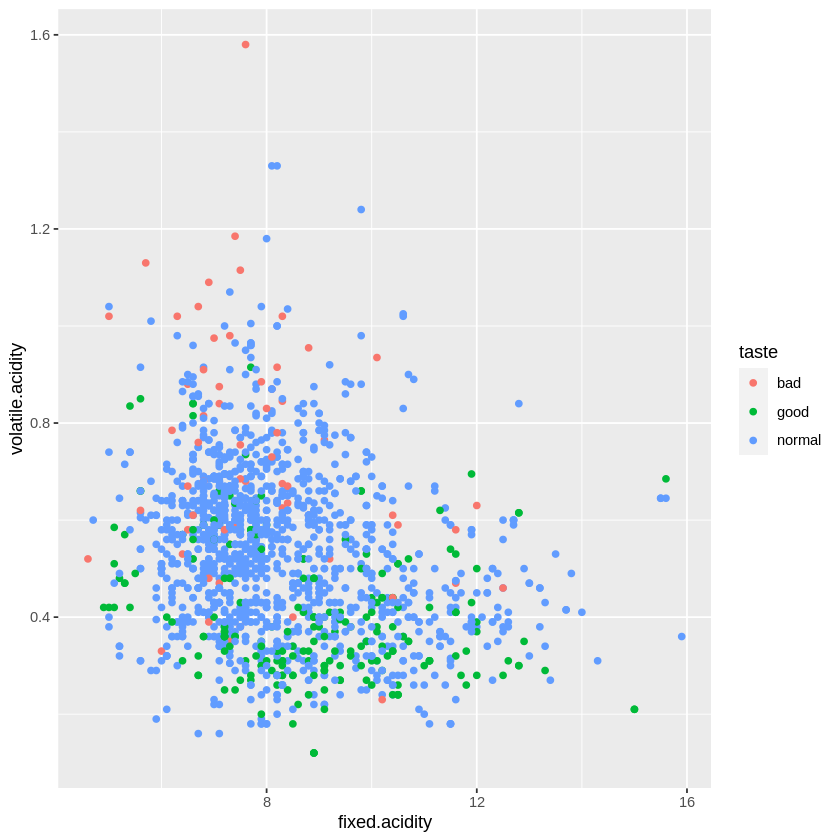

In [55]:
# This command is used to display a scatter plot. The output looks like below
library(ggplot2)
ggplot(wine,aes(fixed.acidity,volatile.acidity))+ geom_point(aes(color=taste))



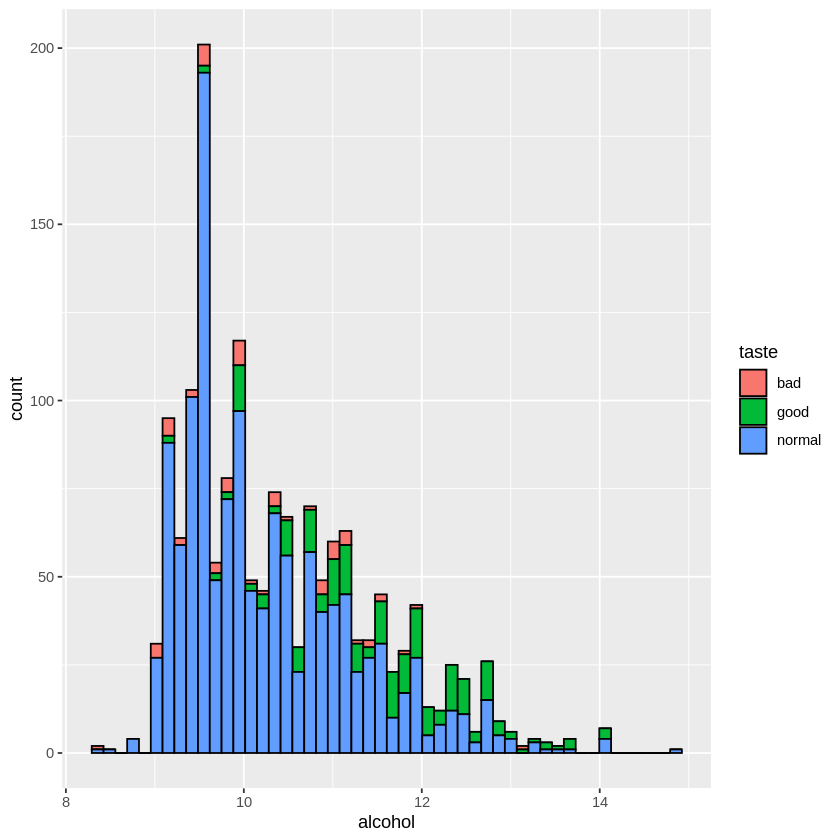

In [56]:
# This command is used to display a stacked bar chart. The output looks like below
ggplot(wine,aes(alcohol)) + geom_histogram(aes(fill=taste),color='black',bins=50)

In [62]:
dim(train)
dim(test)  # Checks the dimensions of training and testing dataset
install.packages('randomForest')

[1] 1279   13

[1] 320  13

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [63]:
# Now that we have installed the randomforest library, let’s build the random forest model
library(randomForest)           # Install the random forest library
model <- randomForest(taste ~ . - quality, data = train, ntree = 1000, mtry = 5)
model


Call:
 randomForest(formula = taste ~ . - quality, data = train, ntree = 1000,      mtry = 5) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 5

        OOB estimate of  error rate: 13.76%
Confusion matrix:
       bad good normal class.error
bad      0    1     51  1.00000000
good     0  104     84  0.44680851
normal   3   37    999  0.03849856

In [64]:
#confusion matrix
model$confusion

,bad,good,normal,class.error
bad,0,1,51,1.00000000
good,0,104,84,0.44680851
normal,3,37,999,0.03849856


In [65]:
# The next step is to validate our model using the test data
prediction <- predict(model, newdata = test)
table(prediction, test$taste)
prediction

          
prediction bad good normal
    bad      1    0      2
    good     0   16      8
    normal  10   13    270

3      7     15     22     23     27     43     47     50     53     57 
normal normal normal normal normal normal normal normal normal normal normal 
    59     62     65     66     82     85     87     97    101    109    110 
normal normal    bad    bad normal normal normal normal normal normal normal 
   111    113    122    123    125    128    135    136    140    146    149 
normal normal normal normal normal normal normal normal normal normal normal 
   150    157    173    176    181    182    183    188    192    214    219 
normal normal normal normal normal normal normal normal normal normal normal 
   220    222    232    233    244    245    246    253    257    263    272 
normal normal normal normal normal normal normal normal normal normal normal 
   273    274    283    284    288    295    296    299    300    301    302 
normal normal normal   good normal normal normal normal normal normal normal 
   305    307    308    313    314    317    320    322    324    333    336 
normal normal normal normal normal normal normal normal normal normal normal 
   338    340    341    342    351    353    354    361    362    364    369 
normal normal normal normal normal normal   good normal normal normal normal 
   371    377    388    399    404    405    410    412    414    416    417 
normal normal normal normal normal normal normal normal normal normal normal 
   418    429    437    442    472    476    483    484    486    491    495 
normal normal normal normal normal normal normal normal normal normal normal 
   496    497    501    505    506    507    509    518    521    527    532 
  good normal normal normal   good normal normal normal normal normal normal 
   543    550    553    556    559    561    570    573    574    580    583 
normal normal normal normal normal normal normal normal normal normal normal 
   585    587    596    607    616    624    629    630    636    638    640 
normal normal normal   good normal normal normal normal normal normal normal 
   644    659    689    692    697    701    702    705    718    719    721 
normal normal normal normal normal normal normal normal normal normal normal 
   725    727    733    738    750    751    754    762    764    770    772 
   bad normal normal normal normal normal normal normal normal normal normal 
   777    784    800    802    804    806    811    815    832    835    841 
normal normal normal normal normal   good normal normal normal normal normal 
   849    854    863    864    869    887    895    897    900    906    907 
normal normal normal normal normal normal normal   good normal normal normal 
   910    912    915    917    922    933    934    935    939    951    964 
  good normal   good normal normal normal normal normal   good   good normal 
   973    977    978    980    991    994    999   1009   1019   1020   1024 
  good normal normal normal normal normal normal   good normal normal   good 
  1025   1028   1037   1040   1042   1045   1058   1059   1066   1073   1085 
  good normal normal normal normal normal normal normal normal normal normal 
  1095   1097   1101   1119   1162   1164   1168   1169   1170   1177   1185 
normal normal   good normal normal normal   good normal normal normal normal 
  1189   1193   1196   1197   1205   1208   1212   1214   1217   1220   1225 
normal   good normal normal   good normal normal normal normal   good normal 
  1228   1229   1232   1242   1244   1245   1251   1252   1263   1264   1267 
normal   good normal normal normal normal normal normal normal normal normal 
  1269   1271   1279   1281   1283   1286   1291   1293   1294   1296   1305 
normal normal normal normal normal normal normal normal normal normal normal 
  1306   1309   1316   1329   1336   1342   1344   1348   1351   1354   1359 
normal normal normal normal normal normal normal normal normal normal normal 
  1360   1368   1372   1373   1385   1388   1392   1403   1405   1407   1408 
normal normal normal normal

In [66]:
# Now, let’s display the predicted vs. the actual values


results<-cbind(prediction,test$taste)

results

colnames(results)<-c('pred','real')

results<-as.data.frame(results)

View(results)


# Finally, let’s calculate the accuracy of the model

sum(prediction==test$taste) / nrow(test) # The output is as shown below

,prediction,
3,3,3
7,3,3
15,3,3
22,3,3
23,3,3
27,3,3
43,3,3
47,3,3
50,3,3
53,3,3


,pred,real
,<int>,<int>
3,3,3
7,3,3
15,3,3
22,3,3
23,3,3
27,3,3
43,3,3
47,3,3
50,3,3


[1] 0.896875